In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

excel_path = r"D:\我的论文\河流水化学组成的时空变化特征及其影响因素的研究\data\离子浓度.xlsx"
df = pd.read_excel(excel_path, sheet_name=0)
mask = df.loc[:, '流域边长 km': ].columns.to_list()
mask.append('重碳酸根离子(HCO3- ) mg/L')
df = df[mask]
null_values = df.isnull()
null_counts = null_values.sum()
# 多项式插值
df_interpolate = df.interpolate(method='polynomial', order=5, axis=0)


In [3]:
field_columns = df_interpolate.columns.to_list()[: -1]
df_feature = df_interpolate.drop('重碳酸根离子(HCO3- ) mg/L', axis=1)
df_feature.head()

,流域边长 km,流域面积 km²,海拔 m,最高海拔 m,最低海拔 m,平均坡度 °,最大坡度 °,最小坡度 °,气温 ℃,地表温度 ℃,...,total_N g/kg,ph_water,clay %,sand %,silt %,effecitive cation exchange capacity mol/kg,total exchangeable bases mol/kg,Al_saturation %,BASE SATURATION AS PERCENTAGE OF CECsoil %,exchangeable sodium percentage %
0,14.7541,5.777669,1024.869565,1039,1015,1.387238,3.722176,0.0,-5.371429,-5.428856,...,1.307308,7.769231,23.461538,42.961538,33.576923,47.076923,47.076923,0.0,98.846154,17.230769
1,14.7541,5.777669,1024.869565,1039,1015,1.387238,3.722176,0.0,16.700000,13.867753,...,1.307308,7.769231,23.461538,42.961538,33.576923,47.076923,47.076923,0.0,98.846154,17.230769
2,14.7541,5.777669,1024.869565,1039,1015,1.387238,3.722176,0.0,25.571429,23.958289,...,1.307308,7.769231,23.461538,42.961538,33.576923,47.076923,47.076923,0.0,98.846154,17.230769
3,14.7541,5.777669,1024.869565,1039,1015,1.387238,3.722176,0.0,12.900000,13.565000,...,1.307308,7.769231,23.461538,42.961538,33.576923,47.076923,47.076923,0.0,98.846154,17.230769
4,14.7541,5.777669,1024.869565,1039,1015,1.387238,3.722176,0.0,-3.871429,-5.550968,...,1.307308,7.769231,23.461538,42.961538,33.576923,47.076923,47.076923,0.0,98.846154,17.230769


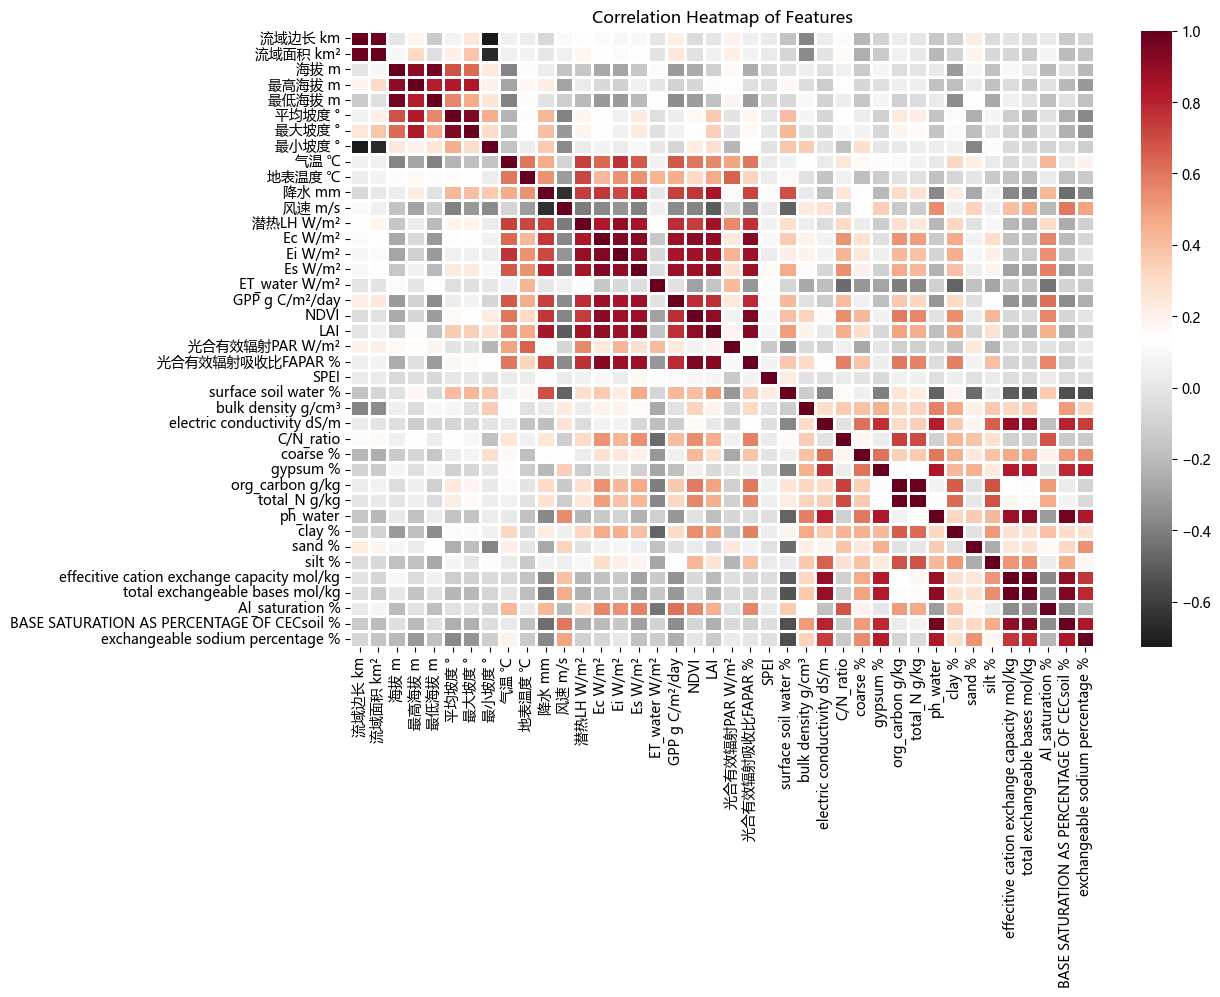

In [18]:
# 特征归一化
scaler = MinMaxScaler()
df_feature_normalize = pd.DataFrame(scaler.fit_transform(df_feature), columns=field_columns)
# df_feature_normalize = pd.DataFrame(scaler.fit_transform(df))

# 相关性矩阵
correlation_matrix = df_feature_normalize.corr(method='spearman')

# 绘图
matplotlib.rcParams['font.family'] = 'Microsoft YaHei'
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='RdGy_r', cbar=True, fmt='.2f', linewidths=0.75)
plt.title('Correlation Heatmap of Features')
plt.show()